## Import Libraries

In [27]:
# Google collab libraries
from google.colab import files

# Base Machine Learning libraries
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Questions



## 1. First Question

### Import dataset (using collab librarie for import files from local folder)


In [2]:
uploaded = files.upload() # Upload file from local folder


Saving diabetes.csv to diabetes.csv


In [3]:
# Load dataset into Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
df.head() # Print five first columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1. First Question Answer  
*(Describe each feature with mean value and standard deviation)*

To describe the impact of the values `<< mean, std, min, max >>`, it is important to look at all of them because they give us more insights about the data.

---

### 1) Pregnancies  
The mean value is very close to the std (standard deviation), meaning that pregnancy values have large variance.  
The minimum value is 0 and the maximum value is 17, showing that pregnancies have outliers (considering also that the 75% value is 6, which is still far from 17).

---

### 2) Glucose  
The mean value is 120 and the max value is 199, which means most people have around 120 glucose in their blood (a bit higher than the normal range of **70–110 mg/dL**).  
The std value (31.97) is about 26% of the mean value, indicating moderate variance, showing that there are a few people with different glucose levels.  
The min value might be wrong because there are no living people with glucose equal to zero.  
The max value is a bit higher than the mean or 75%, so there might be outliers in this feature as well.

---

### 3) BloodPressure  
The mean value is 68.10 (by looking at the table, values are normal).  
On the other hand, the std shows a large variance, 19.35/69.10 = ~28%, meaning that blood pressure is moderately spread (values are approximately 28% around the average).  
This feature also has 0 as a minimum value, which is impossible for a living person.  
The max value is a bit high but still within normal limits, since there are people with high blood pressure (but it might be an outlier).

| Category | Systolic Pressure (mm Hg) | Diastolic Pressure (mm Hg) |
|-----------|----------------------------|-----------------------------|
| **NORMAL** | Less than 120 | Less than 80 |
| **ELEVATED** | 120–129 | Less than 80 |
| **STAGE 1 HYPERTENSION (High Blood Pressure)** | 130–139 | 80–89 |
| **STAGE 2 HYPERTENSION (High Blood Pressure)** | 140 or higher | 90 or higher |
| **SEVERE HYPERTENSION (If you don’t have symptoms\*, call your health care professional.)** | Higher than 180 | And/or higher than 120 |
| **HYPERTENSIVE EMERGENCY (If you have any of these symptoms\*, call 911.)** | Higher than 180 | And/or higher than 120 |

\*Source: [American Heart Association](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

---

### 4) SkinThickness  
The mean value is ~20.53 and the std value is ~15.95.  
The variance is large (around 78%). On one hand, there are people with low skin thickness, and on the other hand, people with very high skin thickness.  
Again, the min value is impossible to be real for a living person, meaning there might be NaN values or something that needs more attention.  
The max value is also large compared to the mean value and the 75% of the dataset, meaning that very few values have high skin thickness and therefore do not represent the entire dataset.

---

### 5) Insulin  
The mean value is ~79.79, which is unusual compared to real insulin data showing normal human insulin levels around **3–25 μIU/mL**, and after eating, insulin levels naturally rise and can reach **30–230 μIU/mL** ([source](https://www.droracle.ai/articles/69542/what-is-normal-insulin-range)).  
That can be explained by looking at the std value, which is equal to 115.24, higher than the mean value. This means the data is very scattered.  
This is confirmed by looking at the min value (zero) and the max value (846), which is huge compared to the mean value and the 75% of the dataset (value might be wrong or misrecorded).

---

### 6) BMI  
The mean value is ~31.9 and the std is ~7.88, meaning there is small variance and most values are close to each other.  
A BMI of 29–31 is between overweight and obese, meaning the dataset is focused on this category of people ([source](https://www.nhlbi.nih.gov/sites/default/files/media/docs/bmi_tbl.pdf)).  
Again, the min value is equal to zero, meaning that there might be NaN values or zero non-useful columns since these values don’t represent the real world.  
The max value is a bit high again, showing outliers due to the small number of people in this category (but it is important to investigate the count of this category).

---

### 7) DiabetesPedigreeFunction  
The mean value is 0.47 and std 0.33 → std/mean = 70%, showing large variance, but it is also important to keep it because it shows the probability of someone having diabetes from their family, so it might differ between people.  
The min value is normal for someone to have just a 2% chance of getting diabetes from their family, but the max value is not very normal since it is an outlier.  
It might also be useless because if it’s true, this person would have 100% chance of diabetes (perhaps).

---

### 8) Age  
Mean = 33 shows that ages are close to 33 years old, with std = 11, meaning that age variance is medium.  
It is normal and also desirable to have different ages to analyze, so the model can be better trained.  
The min value is high — there are no people under 21 years old (this might be because younger people don’t have diabetes and so the dataset focuses on most of the population).  
The max value is 81 years old, which is okay for better variance but not ideal since 75% of the dataset includes younger ages, so there might be an outlier.


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Make histograms for every feature
- Use subplots and a for loop to make them all together at once

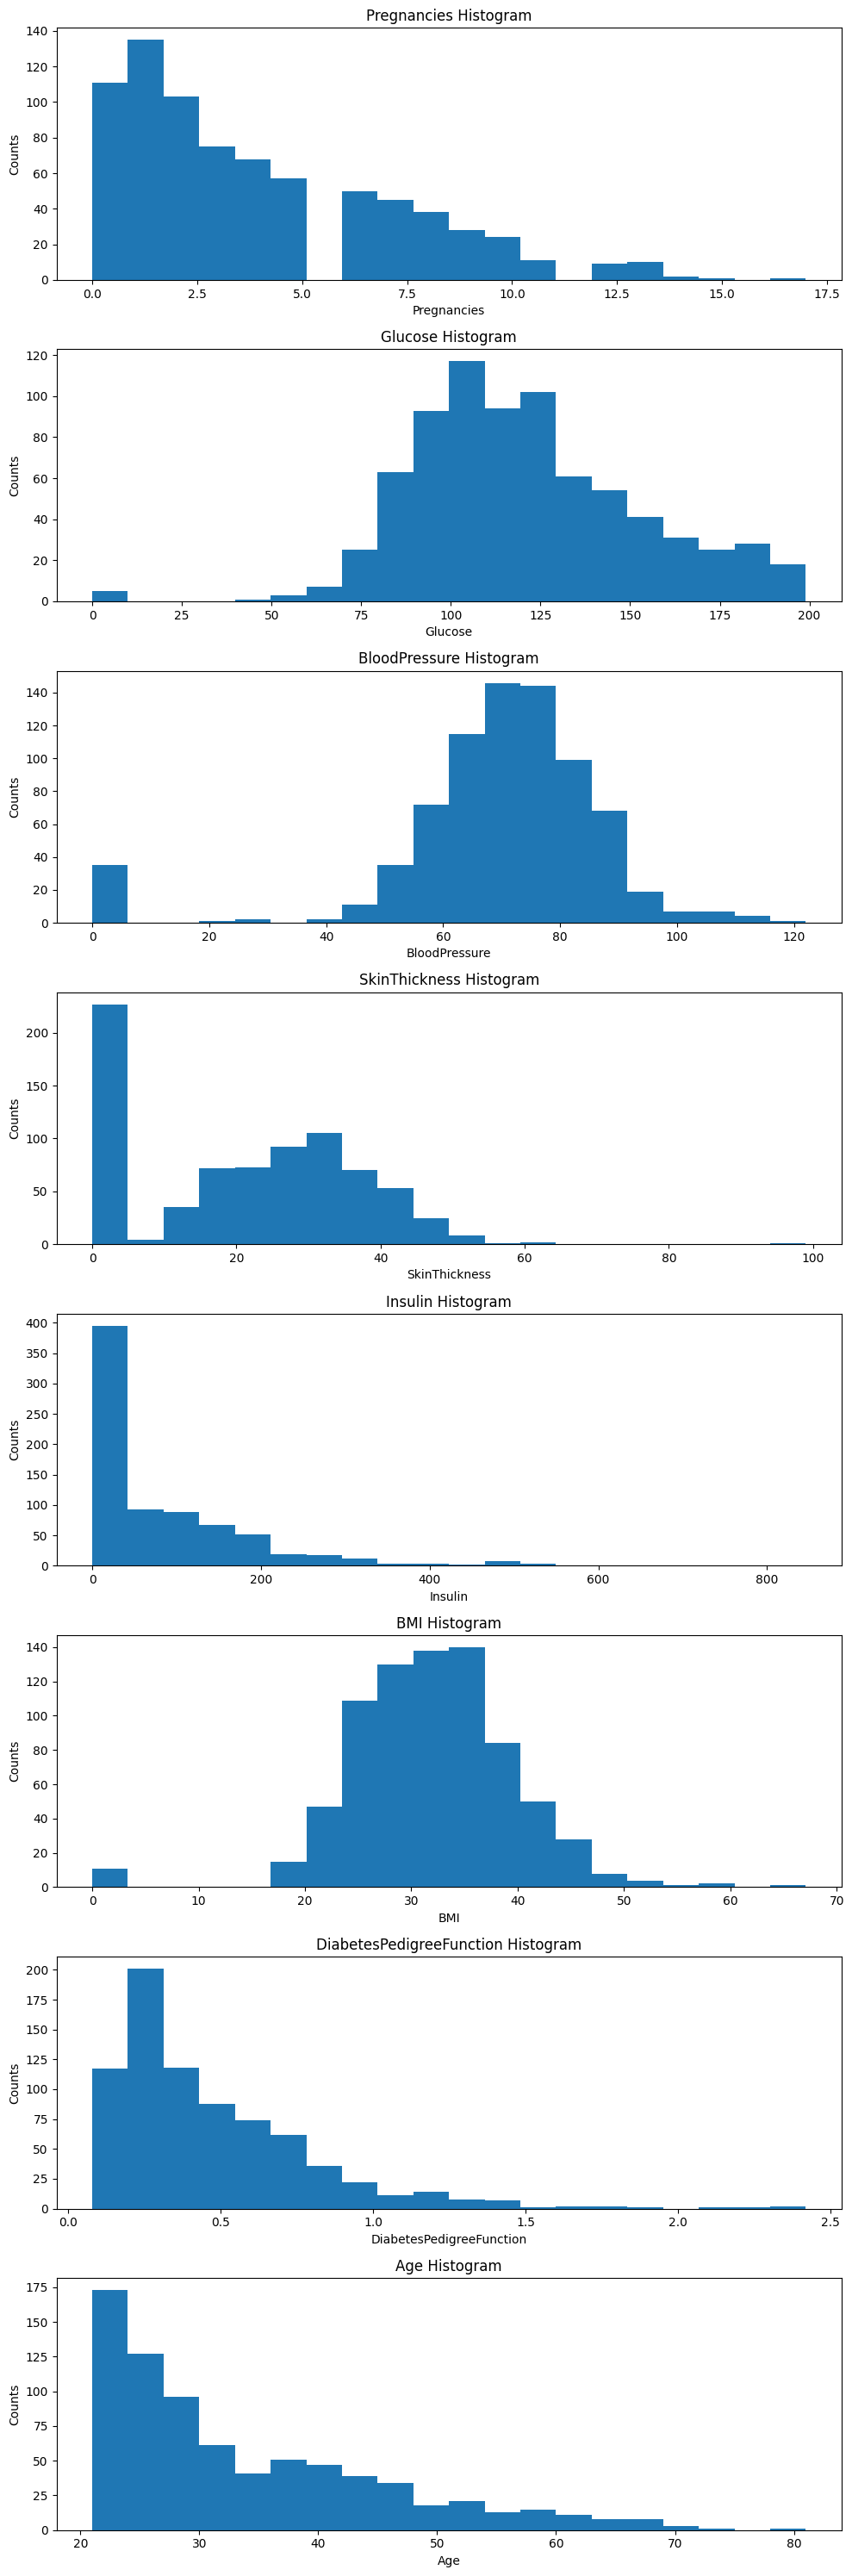

In [5]:
# Input column names into a list
columns = list(df.columns)
columns = columns[:-1] # Remove Outcome keep only --> ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Get how many columns we have
column_length = len(columns)

# Call subplots to create plot for every column in dataFrame
fig, axes = plt.subplots(column_length, 1, figsize=(10, 30))

# For every column in df create a histogram plot with:
# - General title
# - x and y title
for i, col in enumerate(columns):
  ax = axes[i]
  ax.hist(df[col], bins=20)
  ax.set_xlabel(col)
  ax.set_ylabel("Counts")
  ax.set_title(f"{col} Histogram")
  plt.tight_layout() # tight layout keep distances between plots because x label was overlapping title

# Show every plot
plt.show()

### Create bar plots for target value (Outcome)
- Use seaborn library because of the countplot ready function
- Change color for better visualization

/tmp/ipython-input-560412972.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome',palette = "Set2")


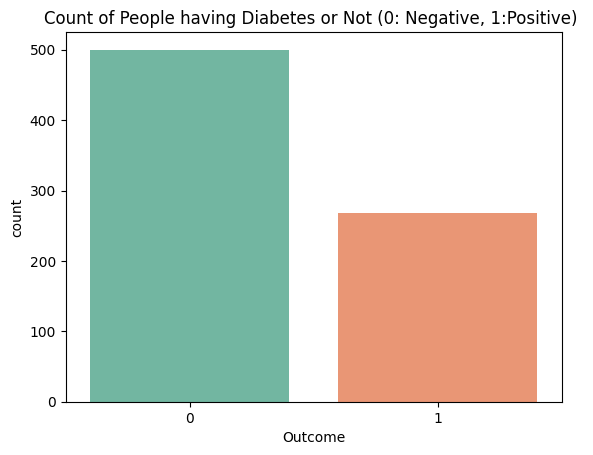

Outcome
0    500
1    268
Name: count, dtype: int64


In [6]:
sns.countplot(data=df, x='Outcome',palette = "Set2")
plt.title("Count of People having Diabetes or Not (0: Negative, 1:Positive) ")
plt.show()
print(df['Outcome'].value_counts())

## 2. Second question answer (*Do you consider the data quality to be good or bad?*)
---

By looking at the bar plot and the .describe function results I am thinking data are not as good as we expect.

**Data quality is bad becuase:**

1) Describe shows that features have some problems regarding the variance and also min/max values shows some problems (outliers and wrong values (Min values are zero which is not possible to be real values)). This happens in most of the features leading to focus on preprocessing techniques

2) By looking at the bar plots zeros are 500 and ones 268. One class is 60% percent of the zeros class. This means we have an unbalanced dataset which will lead to worst results and bad training making difficult for our model to be trained well


## 3. Third question answer (*3. What distribution does the Age variable follow?*)
---

Age histogram shows that there are many people in young ages and not so many in old ages. This might be a problem since machine learning models need enough data in every category to generalize well. We want dense data, not sparse.

Age feature will not be good to train the model because it will lead to make prediction about one specific age be unable to make predictions for older ages.

## 4. Forth question answer (*4. According to clinical studies, if a patient has high glucose levels, it is very likely that they will develop diabetes. Show whether and how this is determined from the data*)
---

By isolating zeros and ones in different DataFrames I got the average of Glucose values for both dataframes.

**Results:**

==== Sum of ones ====

141.25746268656715

==== Sum of zeros ====

109.98

Results verify clinical studies, since people which has diabetes have high glucose levels (normal range of 70–110 mg/dL).


In [7]:
keep_only_ones = df[df['Outcome'] == 1]
keep_only_zeros = df[df['Outcome'] == 0]

print("==== Sum of ones ====")
print(keep_only_ones['Glucose'].mean())

print("==== Sum of zeros ====")
print(keep_only_zeros['Glucose'].mean())


==== Sum of ones ====
141.25746268656715
==== Sum of zeros ====
109.98


## 5. Fifth question answer
---
- Make Numpy array
- Set x as input (features)
- Set y as labels/target (Outcome)
- Train-validation split dataset

In [8]:
# Drop/Remove target value from axis 1 --> Column axis and make it a numpy array
x = df.drop('Outcome', axis=1).to_numpy()

# Save labels into np array
y = df['Outcome'].to_numpy()

print(f"Feature shape --> {x.shape}")
print(f"Labels shape --> {y.shape}")


Feature shape --> (768, 8)
Labels shape --> (768,)


### Train-validation split

In [9]:
# Initialize variables
random_state = 0
test_size = 0.3

# Train-Validation split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=test_size, random_state=random_state) # Validation is the 30% of the dataset 768*0.3 = ~230 and Seed = 0

print(f"x_train shape --> {x_train.shape}")
print(f"x_val shape --> {x_val.shape}")
print(f"y_train shape --> {y_train.shape}")
print(f"y_val shape --> {y_val.shape}")

x_train shape --> (537, 8)
x_val shape --> (231, 8)
y_train shape --> (537,)
y_val shape --> (231,)


## 6. Six question Answer
---
- Import Logistic Regression Classifier
- Train on dataset
- Get accuracy score

*Set max iter to 1000 because when I run the model with 100 (default value) I got this warning:*
```
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
 STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

 Increase the number of iterations (max_iter) or scale the data as shown in:
     https://scikit-learn.org/stable/modules/preprocessing.html

In [10]:
# Import Logistic Regression Model
lg_model = LogisticRegression(max_iter=1000, random_state=0)
lg_model



LogisticRegression(max_iter=1000, random_state=0)

### Train model

In [11]:
lg_model.fit(X=x_train, y=y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Evaluate the model on test set

In [12]:
y_pred = lg_model.predict(x_val)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

### Find model accuracy
- For train set
- For test set

### Question answer (*What do you notice about the accuracy of the test set compared to the train set?*)

Model have better accuracy predicting labels in test set than training set which means model can generalize better with unseen input. Test and Train accuracy are close to each other, so we don't have overfitting or underfitting.

In [13]:
# Find accuracy for test set/validation set
test_accuracy = accuracy_score(y_true=y_val, y_pred=y_pred)
test_accuracy_percentage = round(test_accuracy*100, 2)

print(f"Model accuracy on test set: {test_accuracy_percentage}%")

# Find accuracy for train set
train_y_pred = lg_model.predict(x_train)
train_accuracy = accuracy_score(y_true=y_train, y_pred=train_y_pred)
train_accuracy_percentage = round(train_accuracy*100, 2)
print(f"Model accuracy on training set: {train_accuracy_percentage}%")


Model accuracy on test set: 77.92%
Model accuracy on training set: 76.54%


## 7. Seven question answer
---
Bar plot for accuracy in ages:
- Age < 25
- 25 <= Age < 50
- Age >= 50

### 7. Does your classifier work well for all ages?

Model results:
| Age Category              | Model Accuracy (%) |
|----------------------------|--------------------|
| Age < 25                  | 83.78%             |
| 25 ≤ Age < 50             | 72.93%             |
| Age ≥ 50                  | 87.50%             |

It is working pretty well for ages less than 25 years old and also for older ages (more than 50 years old). Accuracy is more than 80% meaning that model got pretty good results predicting unseen data in these categories.

On the other hand people between ages 25 and 50 have less accuracy. Accuracy close to 72% is not enough for a good model. This means our data are complicated with mixed labels in this category making difficult for a model to find the correct answer(label).

Model accuracy on test set ages less than 25: 
83.78%


Model accuracy on test set 25 <= Age < 50 : 
72.93%


Model accuracy on test set Age >= 50: 
87.5%




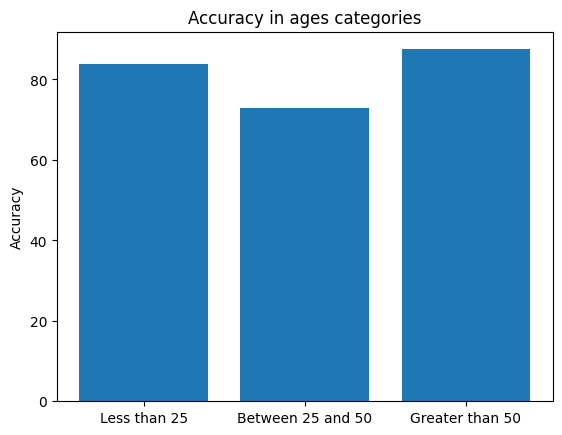

In [14]:
# Find age column index in dataframe
age_index = df.columns.get_loc("Age")

# Make mask for each categorie
mask_25 = x_val[:,age_index] < 25
mask_50 = (x_val[:, age_index] >= 25) & (x_val[:, age_index] < 50)
mask_more_than_50 = x_val[:,age_index] >= 50

# ==================== Age < 25 ====================

x_test_25 = x_val[mask_25]
y_test_25 = y_val[mask_25]
y_pred_25 = lg_model.predict(x_test_25)

# Find accuracy
test_accuracy_25 = accuracy_score(y_true=y_test_25, y_pred=y_pred_25)
test_accuracy_percentage_25 = round(test_accuracy_25*100, 2)

print(f"Model accuracy on test set ages less than 25: \n{test_accuracy_percentage_25}%\n\n")

# ==================== For 25 <= Age < 50 ====================
x_test_50 = x_val[mask_50]
y_test_50 = y_val[mask_50]
y_pred_50 = lg_model.predict(x_test_50)

# Find accuracy
test_accuracy_50 = accuracy_score(y_true=y_test_50, y_pred=y_pred_50)
test_accuracy_percentage_50 = round(test_accuracy_50*100, 2)

print(f"Model accuracy on test set 25 <= Age < 50 : \n{test_accuracy_percentage_50}%\n\n")

# ==================== For Age >= 50 ====================

x_test_more_than_50 = x_val[mask_more_than_50]
y_test_more_than_50 = y_val[mask_more_than_50]
y_pred_more_than_50 = lg_model.predict(x_test_more_than_50)

# Find accuracy
test_accuracy_more_than_50 = accuracy_score(y_true=y_test_more_than_50, y_pred=y_pred_more_than_50)
test_accuracy_percentage_more_than_50 = round(test_accuracy_more_than_50*100, 2)

print(f"Model accuracy on test set Age >= 50: \n{test_accuracy_percentage_more_than_50}%\n\n")

# Initialize values and the column names for barplots
values = [test_accuracy_percentage_25, test_accuracy_percentage_50, test_accuracy_percentage_more_than_50]
column_names = ['Less than 25', 'Between 25 and 50', 'Greater than 50']

plt.bar(column_names, values)
plt.title('Accuracy in ages categories')
plt.ylabel('Accuracy')
plt.show()

## 8. Eight question answer
---
*(What do you think is worse for your classifier in this particular application, predicting that a patient has diabetes, when they don't, or that a patient doesn't have diabetes, when they do?)*

### Answer
This application is made to predict if patient has diabetes or not. It is crucial to avoid missing a diagnosis. This means it is better to predict if someone has diabetes when they don't, rather than fail to detect it.

## 9. Nine qeuestion answer
---
- Repeat 5-6 question code with for loop using different seeds getting Standard Deviation and Mean of the accuracy of all different seeds

In [15]:
train_model_accuracy_list = []
test_model_accuracy_list = []

for seed in range(0,10):

  print(f"==================== Seed = {seed} =====================")
  # Initialize variables
  random_state = seed
  test_size = 0.3

  # Train-Validation split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=test_size, random_state=random_state) # Validation is the 30% of the dataset 768*0.3 = ~230 and Seed = 0

  print(f"x_train shape --> {x_train.shape}")
  print(f"x_val shape --> {x_val.shape}")
  print(f"y_train shape --> {y_train.shape}")
  print(f"y_val shape --> {y_val.shape}")

  # Import Logistic Regression Model
  lg_model = LogisticRegression(max_iter=1000, random_state=seed)

  lg_model.fit(X=x_train, y=y_train)
  y_pred = lg_model.predict(x_val)

  # Find accuracy for test set/validation set
  test_accuracy = accuracy_score(y_true=y_val, y_pred=y_pred)
  test_accuracy_percentage = round(test_accuracy*100, 2)
  print(f"Model accuracy on test set: {test_accuracy_percentage}%")

  # Find accuracy for train set
  train_y_pred = lg_model.predict(x_train)
  train_accuracy = accuracy_score(y_true=y_train, y_pred=train_y_pred)
  train_accuracy_percentage = round(train_accuracy*100, 2)
  print(f"Model accuracy on training set: {train_accuracy_percentage}%")

  train_model_accuracy_list.append(train_accuracy_percentage)
  test_model_accuracy_list.append(test_accuracy_percentage)


  print(f"Accuracy for seed {seed} saved successfully for train and test set!\n\n")

print("=============================================")
print("Accuracy list length for train  --> ",len(train_model_accuracy_list))
print("Accuracy list length for test --> ",len(test_model_accuracy_list))
print("=============================================")


==================== Seed = 0 =====================
x_train shape --> (537, 8)
x_val shape --> (231, 8)
y_train shape --> (537,)
y_val shape --> (231,)
Model accuracy on test set: 77.92%
Model accuracy on training set: 76.54%
Accuracy for seed 0 saved successfully for train and test set!


==================== Seed = 1 =====================
x_train shape --> (537, 8)
x_val shape --> (231, 8)
y_train shape --> (537,)
y_val shape --> (231,)
Model accuracy on test set: 78.35%
Model accuracy on training set: 77.28%
Accuracy for seed 1 saved successfully for train and test set!


==================== Seed = 2 =====================
x_train shape --> (537, 8)
x_val shape --> (231, 8)
y_train shape --> (537,)
y_val shape --> (231,)
Model accuracy on test set: 74.89%
Model accuracy on training set: 78.58%
Accuracy for seed 2 saved successfully for train and test set!


==================== Seed = 3 =====================
x_train shape --> (537, 8)
x_val shape --> (231, 8)
y_train shape --> (537,

### Calculate mean and std for accuracy

| Dataset       | Mean Accuracy (%) | Standard Deviation |
|----------------|------------------:|-------------------:|
| **Training set** | 77.65 | 1.21 |
| **Test set**     | 77.27 | 1.87 |


In [16]:
std_train = np.std(train_model_accuracy_list)
std_test = np.std(test_model_accuracy_list)

mean_train = np.mean(train_model_accuracy_list)
mean_test = np.mean(test_model_accuracy_list)

print("====== For training set ======")
print(f"Mean --> {mean_train}")
print(f"Standard Deviatio --> {std_train}")

print("\n\n====== For test set ======")
print(f"Mean --> {mean_test}")
print(f"Standard Deviatio --> {std_test}")

====== For training set ======
Mean --> 77.65299999999999
Standard Deviatio --> 1.2132934517255065


====== For test set ======
Mean --> 77.27
Standard Deviatio --> 1.8689087725194093


## 10. Ten question answer
---

- Min-max scale (with scikit-learn or using the formula traditionaly)
$$
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

### Math formula

In [17]:
# Drop out the target column (Outcome)
df_x = df.drop(['Outcome'], axis=1)

# Find min and max value for each column
df_min = df_x.min()
df_max = df_x.max()

# Use min max formula and store results into the DataFrame
df_min_max_scale = (df_x - df_min) / (df_max -df_min)

# Print the results
print("Min max scale Data Frame")
print('------------------------')
df_min_max_scale

Min max scale Data Frame
------------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


### Use ready MinMaxScaler from Scikit Learn

In [18]:
# Drop out the target column (Outcome)
df_no_target = df.drop(['Outcome'], axis=1)

scaler = MinMaxScaler()
# scaler.fit_transform returns a np array so I convert it into dataframe for better view
df_minMaxScale = pd.DataFrame(scaler.fit_transform(df_no_target), columns=df_no_target.columns)

# Print the results
print("Min max scale Data Frame with Scikit Learn")
print('------------------------')
df_minMaxScale

Min max scale Data Frame with Scikit Learn
------------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333



###Feature Importance
The larger the absolute weight value, the better.

**Answer:** At first we are getting the coefficients of the model and calculate the absolute value of them. By looking at the bar chart these 3 features affect the prediction of diabetes:

1. DiabetersPedigreeFunction (Family history): Highest value, playing the major role of the model predictions. High psotive value mean that this feature  impact the positive model predictions and if a person's family history had diabetes it is very possible to have too.
2. Pregnacies: Value is not as big as family history but it is also important to be mention since a pregnant woman is more common to have diabetes
3. BMI: Value close to pregnacies showing that a person with high BMI increases the possibilities to be predicted as positive other than someone with smaller BMI.


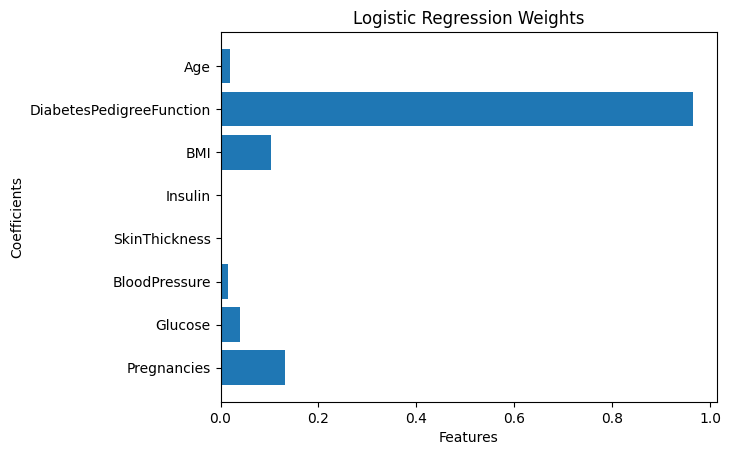

In [19]:
coeffs = lg_model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(df_x.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

# Part 2 – Linear Regression

## 1. First question answer:
- features will use for train -- > ['Pregnancies', 'BloodPressure', 'BMI', 'Age']
- Target column --> Clucose
- Train-test split 30% Test 70% Train

In [20]:
x_column = ['Pregnancies', 'BloodPressure', 'BMI', 'Age']

input_x = df[x_column]
target = df['Glucose']

x_train, x_test, y_train, y_test = train_test_split(input_x, target, test_size=0.3, random_state=0)

print(f"x_train shape --> {x_train.shape}")
print(f"x_val shape --> {x_test.shape}")
print(f"y_train shape --> {y_train.shape}")
print(f"y_val shape --> {y_test.shape}")

x_train shape --> (537, 4)
x_val shape --> (231, 4)
y_train shape --> (537,)
y_val shape --> (231,)


## 2. Second question answer
- Use Linear Regression Model to predict the glucose value based on features

In [21]:
ln_model = LinearRegression()
ln_model

LinearRegression()

### Train model & calculate Mean Squared Error (MSE) and Mean Absolute

In [22]:
# Train model
ln_model.fit(X=x_train, y=y_train)

LinearRegression()

### Which transport is more ideal (Mean Squared Error (MSE) or Mean Absolute Error (MAE))?

MSE is stricter compared to MAE because it squares the errors. It is  giving more weight to large deviations and outliers.
MAE shows how far the model’s predictions are, on average from the real values.

Since this problem focuses on glucose prediction, we want to understand the average prediction error without being too influenced by outliers, MAE is more suitable for this case.

In [23]:
y_pred = ln_model.predict(X=x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute
mae = mean_absolute_error(y_test, y_pred)

print("============= Mean Squared Error =============")
print(mse)
print("============= Mean Absolute =============")
print(mae)


============= Mean Squared Error =============
929.88834927469
============= Mean Absolute =============
23.599990462075155


## 3. Third question answer

In [31]:
alpha = [0.2, 0.4, 0.6, 0.8, 1.0]

mae_list = []

for l in alpha:
  clf = Lasso(alpha=l)
  clf.fit(X=x_train, y=y_train)

  y_pred = clf.predict(x_test)
  mae_list.append(mean_absolute_error(y_test, y_pred))

mae_df = pd.DataFrame(mae_list, columns=['Mean Absolute Error'])
mae_df

,Mean Absolute Error
0,23.594203
1,23.588415
2,23.582629
3,23.576843
4,23.571058


## Four question answer

Logistic regression coefficient is a 2D array this is why we call coef_ we like this [0]

Linear regression coefficient is a 1D array meaning that we call coef_ as it is

- Blood Pressure feature is the less important and so we remove it

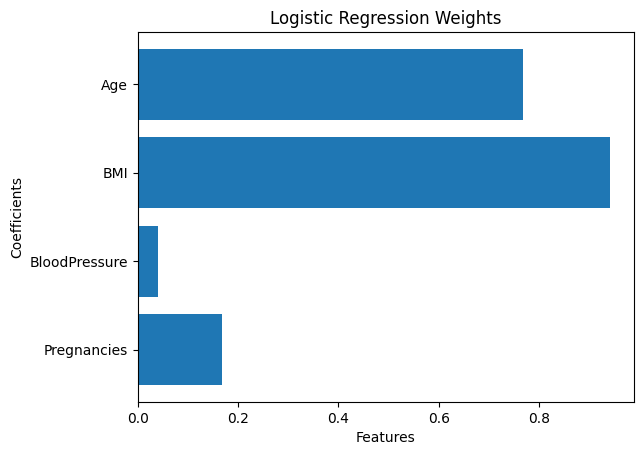

In [33]:
coeffs = ln_model.coef_
importance_weights = np.abs(coeffs)
plt.barh(input_x.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

### Final results

After training, model results got very similar to previous. This is normal, since blood pressure had low coefficient and so metric change only a bit. In this case metric got worst results

In [43]:
# Remove from previous list Blood Pressure
x_column = ['Pregnancies', 'BMI', 'Age']

# ====== Recreate same code as before ======
input_x = df[x_column]
target = df['Glucose']

x_train, x_test, y_train, y_test = train_test_split(input_x, target, test_size=0.3, random_state=0)

ln_model = LinearRegression()

ln_model.fit(X=x_train, y=y_train)
y_pred = ln_model.predict(X=x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute
mae = mean_absolute_error(y_test, y_pred)

print("============= Mean Squared Error =============")
print(mse)
print("============= Mean Absolute =============")
print(mae)


============= Mean Squared Error =============
932.1503886864979
============= Mean Absolute =============
23.615563643141336
